# i. Perkenalan

-----------------------------------------------------------------------------------------------------------------------------------------------

Milestone Phase 1

Nama : Kenneth Vincentius

Batch : HCK - 007

Tujuan : Untuk memprediksi apakah pasien ada potensi terkena serangan jantung atau tidak dengan melihat data kesehatan pasien dengan model yang terbaik

------------------------------------------------------------------------------------------------------------------------------------------------

Latar Belakang : Saya adalah seorang data siencetist yang diberi project dari Rumah Sakit Damai Sejahtera untuk menganalisa pasien pasien apakah memiliki potensi untuk terkena serangan jantung atau tidak dengan melihat detail kesehatan dari masing-masing pasien. 

Problem statement : Menurunkan angka presentase orang yang terkena serangan jantung sebanyak 3% dalam waktu 6 bulan dengan memprediksi agar bisa dicegah sebelum terkena serangan jantung berdasarkan data kesehatan pasien dengan meminimalisir recall ( false negative) pasien sakit jantung tetapi diprediksi tidak sakit jantung

Link Hugging Face : https://huggingface.co/spaces/kennethv1706/Heart_Attack_Prediction

# ii. Import Libraries

In [7]:
#modul persiapan dan penampilan dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pickle
import phik


# modul dari data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from feature_engine.outliers import Winsorizer , OutlierTrimmer
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline

# modul dari library model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'seaborn'

# iii. Data Loading

In [ ]:
#data laoding dan menampilkan 10 data teratas
df=pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
#menampilkan 10 data terbawah
df.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# iv. Exploration Data Analysis

## Data Cleaning

In [ ]:
#melihat nama kolom dan jenis type datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Penjelasan masing-masing kolom :

- Age : Umur pasien

- Sex : gender pasien

        0 : male

        1 : female

- exng: nyeri dada saat olahraga 

        0 = tidak

        1= iya

- caa: melihat jumlah penyakit berdasarkan pembuluh darah yang menuju jantung 

- thalachh : detak jantung maksimum

- cp : Nyeri dada

        1: typical angina

        2: atypical angina

        3: non-anginal pain

        4: asymptomatic
        (semakin rendah angkanya semakin nyeri dada)

- trtbps : tekanan darah pada saat isitirahat (in mm Hg)

- chol : indikasi kolestrol

- fbs : kadar gula pada saat puasa > 120 mg/dl 

        1 = benar 

        0 = salah

- rest_ecg : hasil elektrokardiografi (hasil aktifitas listrik otot jantung)

        Nilai 0: biasa

        Nilai 1 : mengalami kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV)

        Nilai 2: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes

- oldpeak : penyumbatan pembuluh darah arteri koroner

- slp : kemiringan detak jantung saat berolahraga

        Nilai 0: Kemiringan

        Nilai 1: Datar

        Nilai 2: Diagnosis menanjak

- thall : Thallium Stress Test adalah metode pencitraan nuklir yang menunjukkan seberapa baik darah mengalir ke otot jantung, baik saat istirahat maupun saat beraktivitas

        Nilai 0: Tidak Ada (Normal)

        Nilai 1: Cacat Tetap

        Nilai 2: Cacat Reversibel

        Nilai 3: Thalassemia
        
- output : 

        0= tidak terkena serangan jantung

        1= terkena serangan jantung

In [ ]:
#melihat apakah nama kolom yang ada whitespace
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
#melihat apakah ada missing value
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
#mengecek apakah ada duplikasi data 
df.duplicated().sum()

1

In [ ]:
#mencheck duplikasi data 
df[df.duplicated(keep=False)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
#menremove index yang double
index_to_remove = 164
df1 = df.drop(index_to_remove)

In [ ]:
#data yang terduplikasi sudah tidak ada
df1.duplicated().sum()

0

In [ ]:
#memabndingkan target untuk melihat data balance / imbalance
#ternyata data balance
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [ ]:
#merename kolom output menjadi hear_atk agar lebih mudah mengingta target
df1.rename(columns={'output':'heart_atk'}, inplace=True)

## Business Knowledge

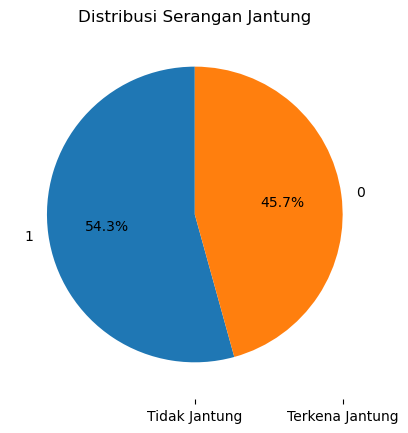

In [ ]:
#membuat variabel baru untuk menampung value counts dari heart attack
ha_freq = df1['heart_atk'].value_counts()
ha_freq

#menggunakan pie chart untuk menampilkan mana yang lebih besar yang terkena serangan jantung atau tidak
plt.pie(ha_freq, labels=ha_freq.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Serangan Jantung')
plt.xticks([0, 1],
           ['Tidak Jantung', 'Terkena Jantung'])
plt.show()

Hasil : Bisa dilihat bahwa yang terkena serangan jantung pada setiap pasien lebih kecil daripada yang tidak terkena serangan jantung. Kita bisa memberikan imbauan sederhana pada setiap pasien yang berobat untuk menjaga pola kesehatan pada pasien yang memiliki agar tidak terkena serangan jantung

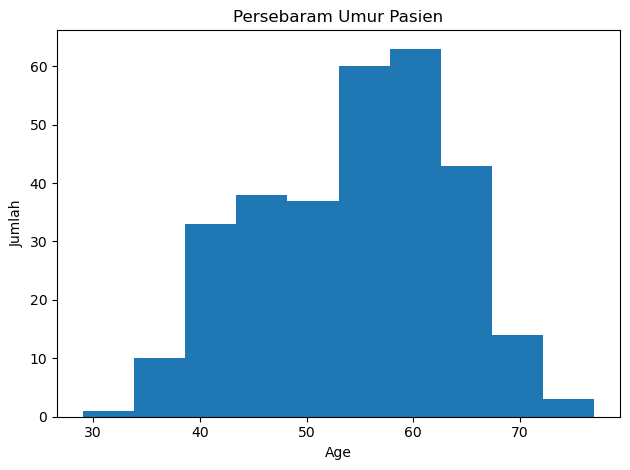

In [ ]:
#membuat histogram persebaran umur
plt.hist(df1['age'])
plt.xlabel('Age')
plt.ylabel('Jumlah')
plt.title('Persebaram Umur Pasien')
plt.tight_layout()
plt.show()

Hasil : Rata-Rata Umur pasien lebih dari 40 tahun sampai 65 tahun dan pasien terbanyak ada diumur 55-60 tahun sehingga pasien pada umur tersebut. Umur yang semakin tua akan lebih rentan terkena serangan jantung walau tidak menutup kemungkinan yang lebih muda bisa terkena serangan jantung juga 

Text(0, 0.5, 'Count')

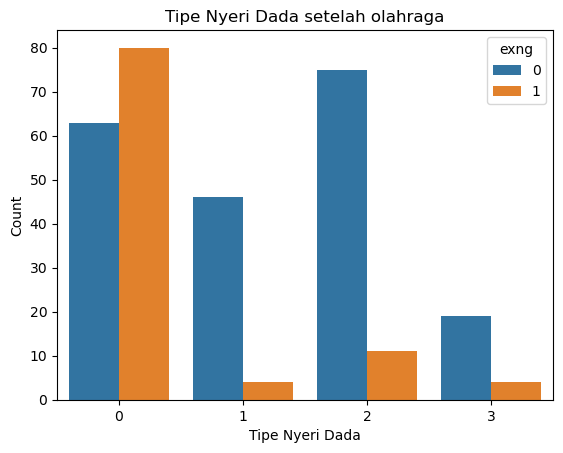

In [ ]:
#membuat countplot tipe nyeri di dada
sns.countplot(x='cp', hue='exng', data=df1)
plt.title('Tipe Nyeri Dada setelah olahraga')
plt.xlabel('Tipe Nyeri Dada')
plt.ylabel('Count')

Hasil : Orang yang memiliki angina tipikal(nyeri dada yang berat) maka akan memiliki nyeri dada ketika berolahraga. Semakin rendah tingkat nyeri dada maka munculnya nyeri dada ketika berolahraga semakin sedikit. 

Saran : Untuk pasien yang memiliki angina tipikal disarankan tidak melakukan aktifitas olahraga yang berat mungkin bisa disarankan dengan olahraga jalan kaki saja untuk mengurangi ,unculnya nyeri dada saat berolahraga

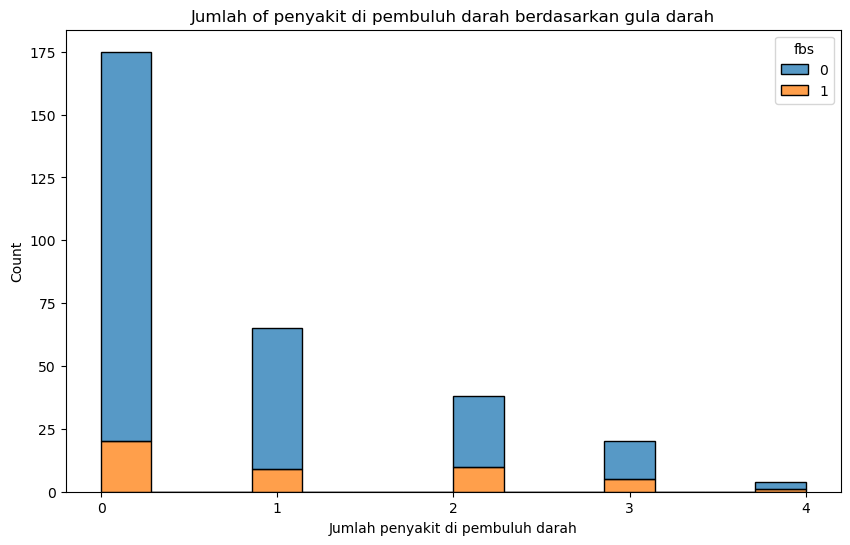

In [ ]:
#membuat history plot terhadap Jumlah of Disease di pembuluh darah berdasarkan gula darah
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df1, x='caa', hue='fbs', multiple="stack", stat="count")
plt.title('Jumlah of penyakit di pembuluh darah berdasarkan gula darah')
plt.xlabel('Jumlah penyakit di pembuluh darah')
plt.ylabel('Count')
plt.xticks(range(5))
plt.show()

Hasil : Kita bisa melihat bahwa semakin besar / semakin banyak penyakit dalam pembuluh darah maka presentasi pasien terkena gula darah semakin besar . Jika dilihat dari yang index 0 jumlah penyakit pembuluh darah yang sedikit maka prentasi pasien yang terkena gula darah semakin rendah begitu juga sebaliknya.

Saran : Orang yang memiliki penyakit di pembuluh darah yang banyak lebih baik disarankan untuk diet gula karena kemungkinan besar pasien terkena diabetes yang bisa membuat orang terkena penyakit jantung


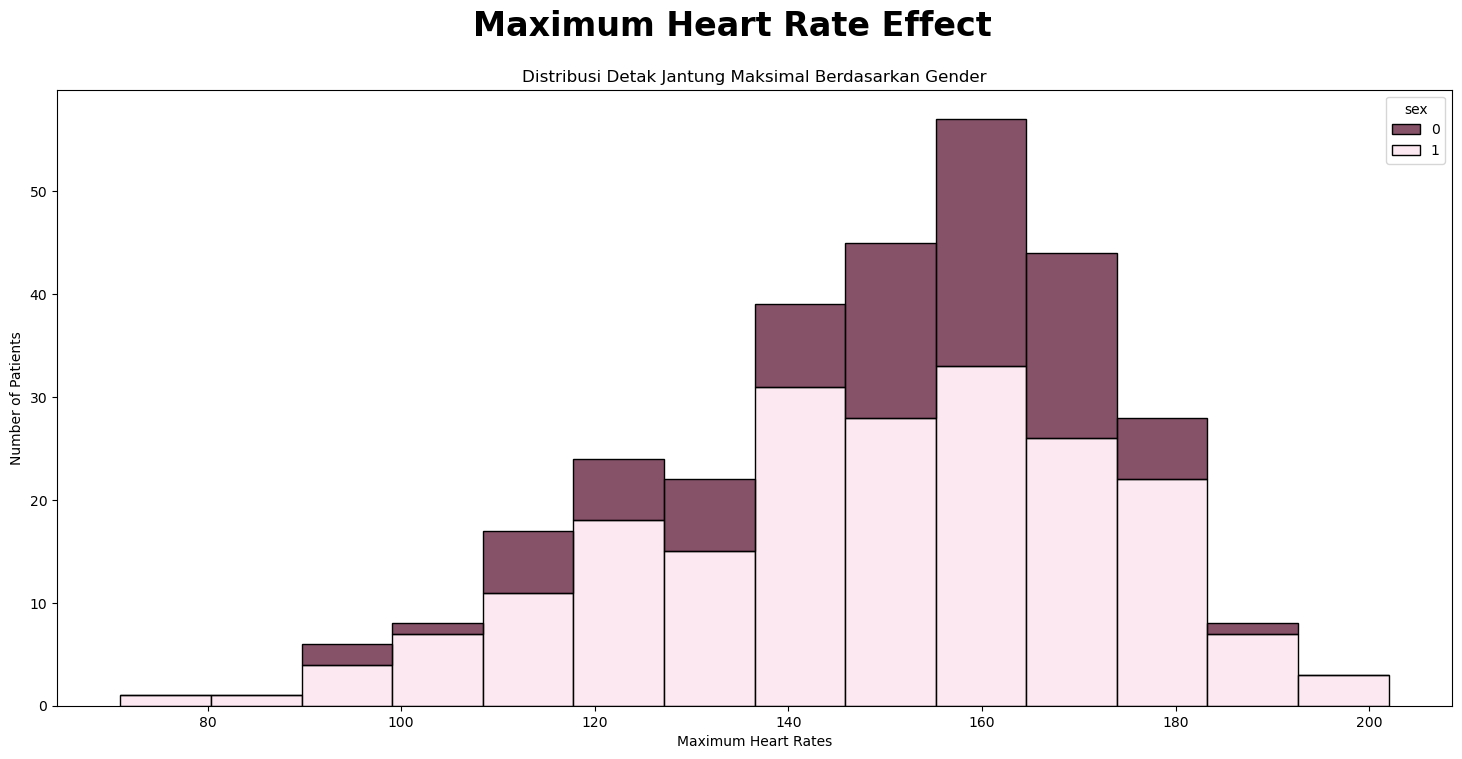

In [ ]:
#menampilkan plot
plt.figure(figsize=(18, 8))

plt.suptitle("Maximum Heart Rate Effect", fontweight='bold', fontsize=24)

# Ganti 'sex' dengan 'hue'
sns.histplot(x='thalachh', hue='sex', data=df, palette=['#5C1835', '#FAE1EC'], multiple="stack", stat="count")

plt.title('Distribusi Detak Jantung Maksimal Berdasarkan Gender')
plt.xlabel('Maximum Heart Rates')
plt.ylabel('Number of Patients')

plt.show()

Notes : 0=Pria , 1= Wanita

Hasil : Bisa dilihat bahwa pria memiliki detak jantuk yang tinggi dibandingkan wanita , walaupun ada wanita yang memiliki detak jantung sampai 200 itu itu dikarenakan pria lebih suka beraktivitas berat dibandingkan dengan wanita sehingga detak jantung pria berdetak lebih cepat dibandingkan dengan wanita

Saran : Untuk pria bisa dipertahankan dengan aktivitas fisik yang sesuai dengan kesahatan fisik dan untuk wanita bisa ditingkatkan untuk aktivitas fisiknya sesuai dengan kondisi fisik untuk meningkatkan kesahatan jantung

Text(0, 0.5, 'Count')

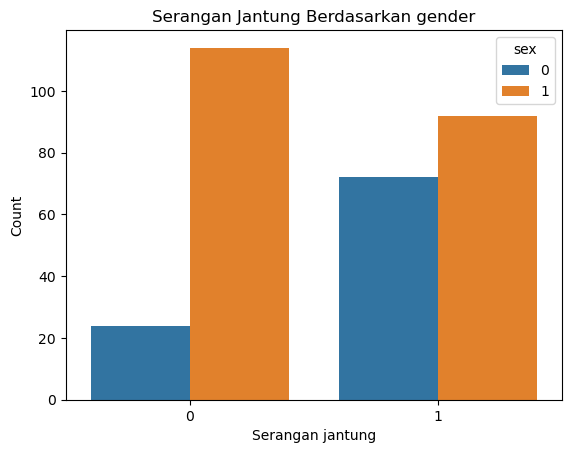

In [ ]:
sns.countplot(x='heart_atk', hue='sex', data=df1)
plt.title('Serangan Jantung Berdasarkan gender')
plt.xlabel('Serangan jantung')
plt.ylabel('Count')

Notes : 

    Serangan jantung : 0 = tidak serangan jantung , 1 = serangan jantung

    Sex : 0 = pria , 1 = perempuan

Hasil : Bisa dilihat wanita lebih banyak terkena serangan jantung dibandingkan pria , akan tetapi jika dilihat secara keseluruhan pria memiliki potensi terkena serangan jantung dibandingkan dengan wanita . Karena jumlah pria yang tidak terkena jantung berbanding cukup jauh lebih sedikit dibandingkan dengan yang terkena serangan jantung . Sehingga presentase pria yang terkena serangan jantung lebih besar daripada 
yang tidak terkena serangan jantung

Saran : Untuk Pria lebih menjaga pola makan dan pola hidup karena kemungkinan terkena serangan jantung lebih besar , tetapi perempuan harus menjaga pola hidup dan menjaga pola makan juga karena jumlah yang terkena serangan jantung lebih besar dari pria


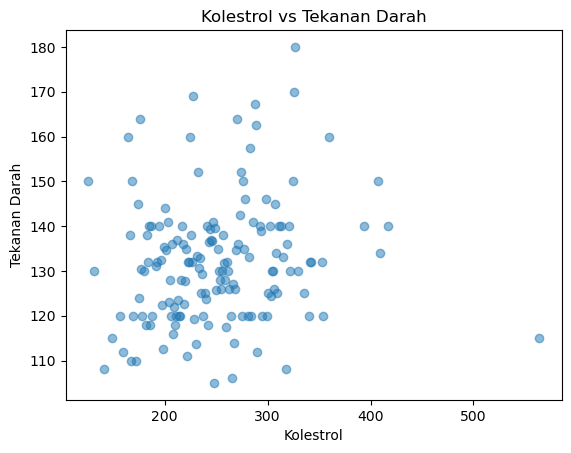

In [ ]:
#menampilkan scatterplot dari kolerasi dan tekanan darah
col_sc = df1.groupby('chol')['trtbps'].mean()

# Membuat scatter plot
plt.scatter(col_sc.index, col_sc.values, alpha=0.5)

plt.xlabel('Kolestrol')
plt.ylabel('Tekanan Darah')
plt.title('Kolestrol vs Tekanan Darah')

# Menampilkan plot
plt.show()

Hasil : Dilihat bahwa orang yang memiliki kolestrol yang semakin tinggi maka tekanan darahnya akan semakin tinggi sehingga disarankan bagi orang yang memiliki kolestrol yang tinggi sudah harus menjaga pola makan untuk menurunkan tekanan darah dalam istirahat

Saran : pasien dengan kadar kolestrol dan tekanan darah yang tinggi bisa mengurangi konsumsi garam , kafein , dan alkohol. Pasien juga bisa meminum obat kolstrol dan obat darah tinggi bila memiliki kadar kolestrol dan tekanan darah yang tinggi

## Cek Kolerasi

In [ ]:
# Membuat Phik Matrix
phik_matrix=df1.phik_matrix()
print(phik_matrix)

# Membuat plot heatmap
fig = plt.figure(figsize=(20, 20), dpi=500)

# Buat plot heatmap dengan ukuran yang diatur
sns.heatmap(phik_matrix, cmap='coolwarm', annot=True)

# Tampilkan heatmap yang lebih besar dengan resolusi tinggi
plt.show()

# Kolom target
target_column = 'heart_atk'

# Menampilkan kolom-kolom yang memiliki korelasi tertinggi dengan kolom target
correlations_with_target = phik_matrix.loc[target_column].drop(target_column)

# Urutkan berdasarkan nilai korelasi
sorted_correlations = correlations_with_target.sort_values(ascending=False)

# Tampilkan kolom dengan korelasi tertinggi dengan kolom target
print("Kolom yang memiliki Korelasi Tertinggi dengan", target_column)
print(sorted_correlations)

interval columns not set, guessing: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'heart_atk']
                age       sex        cp    trtbps      chol       fbs  \
age        1.000000  0.000000  0.179133  0.257338  0.000000  0.000000   
sex        0.000000  1.000000  0.176585  0.000000  0.278464  0.000000   
cp         0.179133  0.176585  1.000000  0.196540  0.000000  0.087554   
trtbps     0.257338  0.000000  0.196540  1.000000  0.000000  0.161880   
chol       0.000000  0.278464  0.000000  0.000000  1.000000  0.000000   
fbs        0.000000  0.000000  0.087554  0.161880  0.000000  1.000000   
restecg    0.317467  0.045470  0.080265  0.282009  0.215988  0.017040   
thalachh   0.524485  0.224999  0.345844  0.220381  0.000000  0.000000   
exng       0.089423  0.192479  0.659221  0.130411  0.000000  0.000000   
oldpeak    0.000000  0.000000  0.267767  0.231146  0.089850  0.000000   
slp        0.000000  0.000000  0.1991

Kolom yang memiliki Korelasi Tertinggi dengan heart_atk
thall       0.728647
cp          0.715669
exng        0.619519
thalachh    0.531788
oldpeak     0.436260
sex         0.412755
caa         0.397037
age         0.339231
slp         0.236969
restecg     0.096921
chol        0.071538
trtbps      0.000000
fbs         0.000000
Name: heart_atk, dtype: float64


Hasil : Saya kan mengambil kolom thall,cp,exng,thalachh,oldpeak,sex,caa,age,slp,chol, dan heart atk

Saya memasanga thresshold 0.3 lalu kenapa saya mengambil slp dan chol karena menurut saya chol yang tinggi akan menyebabkan penumpukan pada pembuluh darah yang menjadi salah satu penyebab penyakit jantung . Untuk slp saya merupakan heart rate dan oxigen ketika berolahraga karena terlalu over berolahraga bisa menyebabkan penyakit jantung

sumber artikel :

chol : https://yankes.kemkes.go.id/view_artikel/935/kolesterol-dan-penyakit-jantung

slp : https://primayahospital.com/jantung/serangan-jantung-saat-olahraga/ 

dan kasus aji masait https://nasional.kompas.com/read/2011/02/05/04324333/~Nasional yang membuat saya tetap mengambil slp

## Feature Selection

In [ ]:
df1.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'heart_atk'],
      dtype='object')

In [ ]:
#membuat variabel baru sebgai feature selection
df_fix = df1[['thall','cp','exng','thalachh','oldpeak','sex','caa','age','slp','chol','heart_atk']]

In [ ]:
#menampilkan data yang sudah di feature selection
df_fix

,thall,cp,exng,thalachh,oldpeak,sex,caa,age,slp,chol,heart_atk
0,1,3,0,150,2.3,1,0,63,0,233,1
1,2,2,0,187,3.5,1,0,37,0,250,1
2,2,1,0,172,1.4,0,0,41,2,204,1
3,2,1,0,178,0.8,1,0,56,2,236,1
4,2,0,1,163,0.6,0,0,57,2,354,1
...,...,...,...,...,...,...,...,...,...,...,...
298,3,0,1,123,0.2,0,0,57,1,241,0
299,3,3,0,132,1.2,1,0,45,1,264,0
300,3,0,0,141,3.4,1,2,68,1,193,0
301,3,0,1,115,1.2,1,1,57,1,131,0


In [ ]:
df_fix.columns

Index(['thall', 'cp', 'exng', 'thalachh', 'oldpeak', 'sex', 'caa', 'age',
       'slp', 'chol', 'heart_atk'],
      dtype='object')

In [ ]:
#membagi dataset menjadi numerical dan kategorical
list_num_col = df_fix[['thalachh', 'oldpeak', 'age','chol']]
list_cat_col = df_fix[['thall', 'cp', 'exng' , 'sex', 'caa','slp', 'heart_atk']]

### VIF

In [ ]:
#mendrop thalach dan age karena setelah dicek vif mereka nilainya tinggi sekali 
list_num_col1 = list_num_col.drop(['thalachh', 'age'], axis=1)

In [ ]:
# Membuat fungsi untuk menghitung Variance Inflation Factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# saya tidak memasukan kolom name karena menggunakan metode one hot encoding

# Define kolom yang dibutuhkan
data_VIF = list_num_col1

# Check Multicolinearity in X

calc_vif(data_VIF)

,variables,VIF
0,oldpeak,1.78094
1,chol,1.78094


Setelah didrop untuk thalachh dan age maka hasil vifnya sudah bagus

### Cardinality

In [ ]:
#menghitung cardinality asming-masing kolom yang sudh di feature selecttion
cols_cat= list_cat_col

for i in cols_cat.columns:
    print(f'cardinality kolom {i}:', cols_cat[i].nunique())

cardinality kolom thall: 4
cardinality kolom cp: 4
cardinality kolom exng: 2
cardinality kolom sex: 2
cardinality kolom caa: 5
cardinality kolom slp: 3
cardinality kolom heart_atk: 2


Hasil : setelah kita cek bahwa cardinalitynya rendah semua sehingga tidak perlu di handling cardinality 

In [ ]:
#menyatukan kembali kolom kategorical dan kolom numerical sebagai feature selection final
df_final = pd.concat([list_num_col1, list_cat_col], axis=1)
df_final

,oldpeak,chol,thall,cp,exng,sex,caa,slp,heart_atk
0,2.3,233,1,3,0,1,0,0,1
1,3.5,250,2,2,0,1,0,0,1
2,1.4,204,2,1,0,0,0,2,1
3,0.8,236,2,1,0,1,0,2,1
4,0.6,354,2,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0.2,241,3,0,1,0,0,1,0
299,1.2,264,3,3,0,1,0,1,0
300,3.4,193,3,0,0,1,2,1,0
301,1.2,131,3,0,1,1,1,1,0


# v. Feature Engineering

In [ ]:
#membagi data yang sudah di future selection menjadi x dan y dengan y yaitu kolom target heart_atk
X= df_fix.drop('heart_atk', axis=1) #fitur
y= df_fix['heart_atk'] #target

In [ ]:
#membagi data menjadi X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3,stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (241, 10)
Test Size  :  (61, 10)
Train Size :  (241,)
Test Size  :  (61,)


## Handling Outlier

In [ ]:
#menghitung persebaran jenis data dengan metode skewness
print(f"Skewness dari distance :{X_train[['oldpeak','chol']].skew()}")

Skewness dari distance :oldpeak    1.361096
chol       0.416991
dtype: float64


In [ ]:
#karena oldpeak memiliki skewness lebih dari 0.5 maka data dihandling outlier dengan iqr / tukey rule
#karena chol memiliki skewness kurang dari 0.5 maka data dihandling outlier dengan std / z-score / gaussian
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', MinMaxScaler())    
    ])
num_pipeline2 = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
    ])
num_tr1 = num_pipeline.fit_transform(X_train[['oldpeak']])
num_tr2 = num_pipeline2.fit_transform(X_train[['chol']])


In [ ]:
#membuat pipeline untuk kolom kategorical 
cat_pipeline = Pipeline([
     ('passthrough', None)
    ])

cat_tr = cat_pipeline.transform(X_train[['thall', 'cp', 'exng', 'sex', 'caa', 'slp']])
cat_tr_array = np.array(cat_tr)

cat_tr_array

array([[3, 2, 0, 1, 0, 1],
       [3, 0, 1, 1, 3, 2],
       [3, 0, 1, 1, 1, 1],
       ...,
       [2, 2, 0, 0, 0, 1],
       [3, 2, 0, 1, 0, 0],
       [3, 2, 0, 1, 2, 2]], dtype=int64)

In [ ]:
# Membuat pipeline keseluruhan dari kolom kategorical dan numerical
full_pipeline = ColumnTransformer([
        ("num1", num_pipeline, ['oldpeak']),
        ("num2", num_pipeline2, ['chol']),
        ("cat", cat_pipeline, ['thall', 'cp', 'exng', 'sex', 'caa', 'slp']),
    ])

# Melihat hasil pipeline train
X_train_finals = full_pipeline.fit_transform(X_train)
X_train_finals

array([[0.12903226, 0.3166326 , 3.        , ..., 1.        , 0.        ,
        1.        ],
       [0.29032258, 0.77789985, 3.        , ..., 1.        , 3.        ,
        2.        ],
       [0.48387097, 0.79744507, 3.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.24193548, 0.31272356, 2.        , ..., 0.        , 0.        ,
        1.        ],
       [0.12903226, 0.42608585, 3.        , ..., 1.        , 0.        ,
        0.        ],
       [0.51612903, 0.36354113, 3.        , ..., 1.        , 2.        ,
        2.        ]])

In [ ]:
#membuat x_train_finals ke dalam bentuk dataframe agar bisa di pipeline
X_train_finals= pd.DataFrame(X_train_finals, columns=['oldpeak','chol','thall', 'cp', 'exng', 'sex', 'caa', 'slp'])

In [ ]:
# Melihat hasil pipeline test
X_test_finals = full_pipeline.transform(X_test)
X_test_finals

array([[ 0.30645161,  1.        ,  3.        ,  0.        ,  1.        ,
         0.        ,  2.        ,  1.        ],
       [ 0.        ,  0.35963209,  2.        ,  2.        ,  0.        ,
         1.        ,  4.        ,  2.        ],
       [ 0.        ,  0.52381196,  2.        ,  2.        ,  0.        ,
         0.        ,  1.        ,  2.        ],
       [ 0.25806452,  0.59417476,  3.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ],
       [ 0.32258065,  0.59026571,  3.        ,  0.        ,  1.        ,
         1.        ,  2.        ,  1.        ],
       [ 0.        ,  0.2814512 ,  1.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ],
       [ 0.        ,  0.25799693,  2.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ],
       [ 0.03225806,  0.61371998,  3.        ,  3.        ,  0.        ,
         1.        ,  0.        ,  1.        ],
       [ 0.19354839,  1.        

In [ ]:
#membuat x_test_finals ke dalam bentuk dataframe agar bisa di pipeline
X_test_finals= pd.DataFrame(X_test_finals, columns=['oldpeak','chol','thall', 'cp', 'exng', 'sex', 'caa', 'slp'])

# vi. Model Definition

In [ ]:
#mendefine model-model yang akan dibandingkan dan digunakan nantinya
model_svm = SVC()
model_knn = KNeighborsClassifier()
model_rf = RandomForestClassifier()
model_dt = DecisionTreeClassifier()
model_ab = AdaBoostClassifier()

In [ ]:
# Melakukan fitting pada svm
model_svm.fit(X_train_finals, y_train)

svm_train = model_svm.predict(X_train_finals)
svm_test = model_svm.predict(X_test_finals)

print(classification_report(y_train, svm_train))
print(classification_report(y_test, svm_test))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       110
           1       0.85      0.93      0.89       131

    accuracy                           0.88       241
   macro avg       0.88      0.87      0.87       241
weighted avg       0.88      0.88      0.87       241

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



SVM recall memiliki nilai deafult train 0.93 dan test 0.88

In [ ]:
# Melakukan fitting pada knn
model_knn.fit(X_train_finals, y_train)

knn_train = model_knn.predict(X_train_finals)
knn_test = model_knn.predict(X_test_finals)

print(classification_report(y_train, knn_train))
print(classification_report(y_test, knn_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       110
           1       0.88      0.92      0.90       131

    accuracy                           0.89       241
   macro avg       0.89      0.89      0.89       241
weighted avg       0.89      0.89      0.89       241

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



KNN recall memiliki nilai deafult train 0.92 dan test 0.85

In [ ]:
# Melakukan fitting pada random forest
model_rf.fit(X_train_finals, y_train)

rf_train = model_rf.predict(X_train_finals)
rf_test = model_rf.predict(X_test_finals)

print(classification_report(y_train, rf_train))
print(classification_report(y_test, rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       131

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



Random Forest recall default memiliki nilai train 1 dan test 0.88 

In [ ]:
# Melakukan fitting pada random forest
model_dt.fit(X_train_finals, y_train)

dt_train = model_dt.predict(X_train_finals)
dt_test = model_dt.predict(X_test_finals)

print(classification_report(y_train, dt_train))
print(classification_report(y_test, dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       131

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

              precision    recall  f1-score   support

           0       0.72      0.64      0.68        28
           1       0.72      0.79      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



Decision Tree recall default memiliki nilai train 1 dan test 0.79

In [ ]:
model_ab.fit(X_train_finals, y_train)

ab_train = model_ab.predict(X_train_finals)
ab_test = model_ab.predict(X_test_finals)

print(classification_report(y_train, dt_train))
print(classification_report(y_test, dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       131

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

              precision    recall  f1-score   support

           0       0.72      0.64      0.68        28
           1       0.72      0.79      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



Ada Boost recall default memiliki nilai train 1 dan test 0.79

# vii. Model Training

## Cross Validation

Disini saya menggunakan cross validation untuk mencari model mana yang terbaik untuk nantinya dihyperparameter tuning dengan Random Search yang mana nantinya akan dibandingkan antara baseline model dan model yang telah dihyperparameter tuning untuk mendapatkan hasil yang terbaik
Saya menggunakan recall sebagai penilai saya karena saya ingin meminimalisir FALSE NEGATIVE dimana orang memiliki chance lebih besar terkena serangan jantung akan tetapi diprediksi lebih kecil chance terkena serangan jantung

Disini saya memasang threshold < 0.1 sebagai best fit , jika lebih dair itu maka model menjadi overfit berdasarkan dari nilai std 

In [ ]:
#pipeline SVM
pipeline_svc = Pipeline([
    ("preprocess", full_pipeline),
    ("classifier", SVC())
])

recall_train_cross_val_svm = cross_val_score(
    pipeline_svc, X_train_finals, y_train, cv=5, scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_svm)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_svm.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_svm.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_svm.mean() - recall_train_cross_val_svm.std()), '-',
      (recall_train_cross_val_svm.mean() + recall_train_cross_val_svm.std()))

Recall Score - All - Cross Validation  :  [0.96296296 0.73076923 0.96153846 0.92307692 0.88461538]
Recall Score - Mean - Cross Validation :  0.8925925925925927
Recall Score - Std - Cross Validation  :  0.08588975789320662
Recall Score - Range of Test-Set       :  0.8067028346993861 - 0.9784823504857993


Dari hasil std yang kecil bisa dibilang model adalah best fit

In [ ]:
#pipeline KNN
pipeline_knn = Pipeline([
    ("preprocess", full_pipeline),
    ("classifier", KNeighborsClassifier())
])

recall_train_cross_val_knn = cross_val_score(
    pipeline_knn, X_train_finals, y_train, cv=5, scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_knn )
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_knn .mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_knn .std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_knn .mean() - recall_train_cross_val_knn.std()), '-',
      (recall_train_cross_val_knn .mean() + recall_train_cross_val_knn.std()))

Recall Score - All - Cross Validation  :  [0.96296296 0.73076923 0.92307692 0.96153846 0.88461538]
Recall Score - Mean - Cross Validation :  0.8925925925925927
Recall Score - Std - Cross Validation  :  0.08588975789320662
Recall Score - Range of Test-Set       :  0.8067028346993861 - 0.9784823504857993


Dari hasil std yang kecil bisa dibilang model adalah best fit

In [ ]:
#pipeline Random Forest
pipeline_rf = Pipeline([
    ("preprocess", full_pipeline),
    ("classifier", RandomForestClassifier())
])

recall_train_cross_val_rf = cross_val_score(
    pipeline_rf, X_train_finals, y_train, cv=5, scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_rf)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_rf.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_rf.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_rf.mean() - recall_train_cross_val_rf.std()), '-',
      (recall_train_cross_val_rf.mean() + recall_train_cross_val_rf.std()))

Recall Score - All - Cross Validation  :  [0.96296296 0.53846154 0.88461538 1.         0.80769231]
Recall Score - Mean - Cross Validation :  0.8387464387464387
Recall Score - Std - Cross Validation  :  0.16411690741368382
Recall Score - Range of Test-Set       :  0.6746295313327549 - 1.0028633461601226


Dari hasil std yang cukup besar maka model ini overfit

In [ ]:
#pipeline Decision Tree
pipeline_dt = Pipeline([
    ("preprocess", full_pipeline),
    ("classifier", DecisionTreeClassifier())
])
recall_train_cross_val_dt = cross_val_score(
    pipeline_dt, X_train_finals, y_train, cv=5, scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_dt)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_dt.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_dt.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_dt.mean() - recall_train_cross_val_dt.std()), '-',
      (recall_train_cross_val_dt.mean() + recall_train_cross_val_dt.std()))

Recall Score - All - Cross Validation  :  [0.88888889 0.61538462 0.69230769 0.84615385 0.76923077]
Recall Score - Mean - Cross Validation :  0.7623931623931625
Recall Score - Std - Cross Validation  :  0.09958640453763765
Recall Score - Range of Test-Set       :  0.6628067578555248 - 0.8619795669308001


Dari hasil std yang kecil bisa dibilang model adalah best fit

In [ ]:
#pipeline Decision Tree
pipeline_ad = Pipeline([
    ("preprocess", full_pipeline),
    ("classifier", AdaBoostClassifier())
])

recall_train_cross_val_ab = cross_val_score(
    pipeline_ad, X_train_finals, y_train, cv=5, scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val_ab)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val_ab.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val_ab.std())
print('Recall Score - Range of Test-Set       : ',
      (recall_train_cross_val_ab.mean() - recall_train_cross_val_ab.std()), '-',
      (recall_train_cross_val_ab.mean() + recall_train_cross_val_ab.std()))

Recall Score - All - Cross Validation  :  [0.96296296 0.76923077 0.88461538 0.96153846 0.84615385]
Recall Score - Mean - Cross Validation :  0.8849002849002849
Recall Score - Std - Cross Validation  :  0.07327754958193658
Recall Score - Range of Test-Set       :  0.8116227353183484 - 0.9581778344822215


Dari hasil std yang kecil bisa dibilang model adalah best fit

### Kesimpulan Cross Validation

Karena model svm memiliki nilai recal score range test set yang paling besar maka saya memilih model SVM yaitu

Recall Score - Range of Test-Set       :  0.8067028346993861 - 0.9784823504857993

Jadinya untuk Model SVM akan saya hyperparameter tuning dengan randomsearch untuk nantinya dibandingkan baseline model

Sebelumnya saya sudah membandingkan antara KNN dan SVM akan tetapi hasil final lebih bagus SVM

# viii. Model Evaluation

Saya menggunakan randomsearch untuk mempersingkat waktu pada saat hyperparameter tuning karena waktunya lebih cepat dibandingkan dengan grid seacrh

In [ ]:
#mendefine parameter untuk SVM random search
random_search_params = {
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__gamma': ['auto', 'scale'],
    'classifier__kernel': ['poly', 'linear', 'rbf','sigmoid'] ,
    'classifier__degree' :[2,3,4,5]
}

# Buat objek RandomizedSearchCV
svm_randomcv = RandomizedSearchCV(
    estimator=pipeline_svc,
    param_distributions=random_search_params,
    n_iter=100,
    cv=5,
    random_state=3,
    n_jobs=-1,
    scoring='recall'
)

# Fit pipeline untuk hyperparameter tuning
svm_randomcv.fit(X_train_finals, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num1',
                                                                               Pipeline(steps=[('outlier',
                                                                                                Winsorizer(capping_method='iqr',
                                                                                                           tail='both')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['oldpeak']),
                                                                              ('num2',
                                                                               Pipeline(steps=[('outlier',
                                                                                                Winsorizer(tail='both')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['chol']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('passthrough',
                                                                                                None)]),
                                                                               ['thall',
                                                                                'cp',
                                                                                'exng',
                                                                                'sex',
                                                                                'caa',
                                                                                'slp'])])),
                                             ('classifier', SVC())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'classifier__C': [0.1, 1.0, 10.0],
                                        'classifier__degree': [2, 3, 4, 5],
                                        'classifier__gamma': ['auto', 'scale'],
                                        'classifier__kernel': ['poly', 'linear',
                                                               'rbf',
                                                               'sigmoid']},
                   random_state=3, scoring='recall')

In [ ]:
#mencari parameter terbaik jika model yang sudah di random search ini terpilih
svm_randomcv.best_params_

{'classifier__kernel': 'sigmoid',
 'classifier__gamma': 'auto',
 'classifier__degree': 2,
 'classifier__C': 0.1}

In [ ]:
svm_randomcv_best = svm_randomcv.best_estimator_

In [ ]:
#melihat mean dan standard deviasi dari hyperparamter tuning random search
print(svm_randomcv.cv_results_['mean_test_score'].mean())
print(svm_randomcv.cv_results_['mean_test_score'].std())

0.8693227682811017
0.07917859262807916


Karena stdnya mendekati 0 dan mean yang mendekati 1 maka model ini adalah best fit menurut saya

Recall Score - Train Set  :  0.9541984732824428 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.52      0.66       110
           1       0.70      0.95      0.81       131

    accuracy                           0.76       241
   macro avg       0.80      0.74      0.73       241
weighted avg       0.79      0.76      0.74       241
 

Confusion Matrix      : 


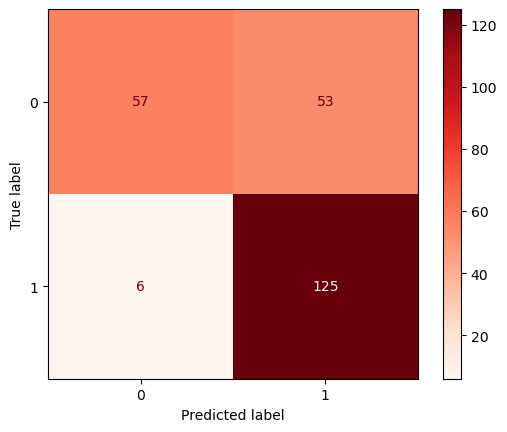

In [ ]:
#melihat hasil data yang sudah di training dengan metode random search
y_pred_train_finals = svm_randomcv_best.predict(X_train_finals)

print('Recall Score - Train Set  : ', recall_score(y_train, y_pred_train_finals), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_finals), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_randomcv, X_train_finals, y_train, cmap='Reds'))

Recall Score - Test Set  :  0.9696969696969697 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.50      0.65        28
           1       0.70      0.97      0.81        33

    accuracy                           0.75        61
   macro avg       0.81      0.73      0.73        61
weighted avg       0.80      0.75      0.74        61
 

Confusion Matrix      : 


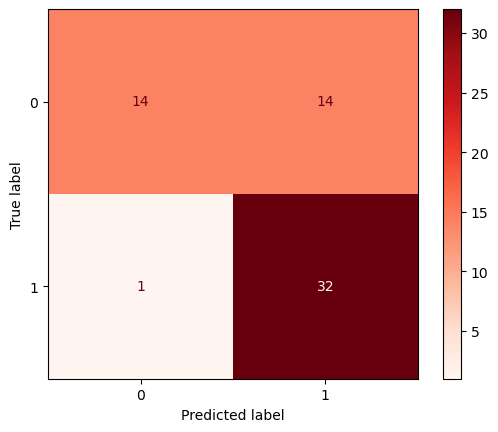

In [ ]:
#menampilkan hasil data test dengan metode random search
y_pred_test_finals = svm_randomcv_best.predict(X_test_finals)

print('Recall Score - Test Set  : ', recall_score(y_test, y_pred_test_finals), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_finals), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_randomcv, X_test_finals, y_test, cmap='Reds'))

Kesimpulan : Bisa dilihat bahwa model ini bestfit dan bagus dikarenakan Recall Score antara train dan test tidak terlalu jauh dengan score :

Recall Score - Train Set  :  0.9541984732824428 

Recall Score - Test Set  :  0.9696969696969697 

In [ ]:
#membuat table baru default untuk nantinya membandingkan dengan nilai recall score test yang default dan yang sudah dengan menggunakan random seach
all_reports = {}
def performance_report(all_reports, y_train, svm_train, y_test, svm_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, svm_train),
      'train - recall' : recall_score(y_train, svm_train),
      'train - accuracy' : accuracy_score(y_train, svm_train),
      'train - f1_score' : f1_score(y_train, svm_train),
      'test - precision' : precision_score(y_test, svm_test),
      'test - recall' : recall_score(y_test, svm_test),
      'test - accuracy_score' : accuracy_score(y_test, svm_test),
      'test - f1_score' : f1_score(y_test, svm_test),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, svm_train, y_test, svm_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.786885
test - f1_score,0.816901
test - precision,0.763158
test - recall,0.878788
train - accuracy,0.875519
train - f1_score,0.890511
train - precision,0.853147
train - recall,0.931298


In [ ]:
#membuat table baru random search untuk nantinya membandingkan dengan nilai recall score test yang default dan yang sudah dengan menggunakan random seach
all_reports = performance_report(all_reports, y_train, y_pred_train_finals, y_test, y_pred_test_finals, 'Random Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Random Search
train - precision,0.853147,0.702247
train - recall,0.931298,0.954198
train - accuracy,0.875519,0.755187
train - f1_score,0.890511,0.809061
test - precision,0.763158,0.695652
test - recall,0.878788,0.969697
test - accuracy_score,0.786885,0.754098
test - f1_score,0.816901,0.810127


kesimpulan : saya mengambil model SVM yang sudah di random search karena memiliki nilai yang bagus yatiu 0.97 dibandingkan dengan baseline model yang hanya 0.87 pada di data inference untuk mempredict apakah pasien terkena serangan jantung atau tidak adalah SVM Random Search

# ix. Model Saving

In [ ]:
#mengecek kembali pipeline preprocessing
full_pipeline

ColumnTransformer(transformers=[('num1',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             tail='both')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['oldpeak']),
                                ('num2',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(tail='both')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['chol']),
                                ('cat', Pipeline(steps=[('passthrough', None)]),
                                 ['thall', 'cp', 'exng', 'sex', 'caa', 'slp'])])

In [ ]:
#mendefine model SVM hyperparameter tuning beserta parameter terbaik untuk dimasukkan kedalam pipeline
svm_model = SVC(kernel='sigmoid', gamma='auto', C=1.0, degree=2)
svm_model.fit(X_train_finals, y_train)

SVC(degree=2, gamma='auto', kernel='sigmoid')

In [ ]:
# Memasukkan model ke dalam pipeline untuk dimasukkan ke dalam data inference selanjutnya
full_process = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", svm_model)
])

full_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['oldpeak']),
                                                 ('num2',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['chol']),
                                                 ('cat',
                                                  Pipeline(steps=[('passthrough',
                                                                   None)]),
                                                  ['thall', 'cp', 'exng', 'sex',
                                                   'caa', 'slp'])])),
                ('classification',
                 SVC(degree=2, gamma='auto', kernel='sigmoid'))])

# Model Saving

In [ ]:
# Menyimpan model menggunakan pickle
with open('full_process.pkl', 'wb') as file:
    pickle.dump((full_process), file)